# __Data Visualization Test__

In [1]:
import mysql.connector
import sqlalchemy as db
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode, skew, f_oneway
import re
import statistics as st

In [2]:
con = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd=''
)

In [3]:
c = con.cursor(buffered=True)
query = 'SHOW databases'
c.execute(query)

In [4]:
c.fetchall()

[('flask_mysql',),
 ('hotwheels',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sql_hr',),
 ('sql_inventory',),
 ('sql_invoicing',),
 ('sql_store',),
 ('sys',),
 ('world',)]

In [5]:
query = 'USE world'
c.execute(query)

In [6]:
query = 'SHOW tables'
c.execute(query)
c.fetchall()

[('city',), ('country',), ('countrylanguage',)]

In [7]:
con

### 1. Import table dr 3 DataFrame

In [8]:
c = con.cursor()
q = 'SELECT * FROM city'
c.execute(q)
f = c.fetchall()
city = pd.DataFrame(f, columns=c.column_names)

In [9]:
c = con.cursor()
q = 'SELECT * FROM country'
c.execute(q)
f = c.fetchall()
country = pd.DataFrame(f, columns=c.column_names)

In [10]:
c = con.cursor()
q = 'SELECT * FROM countrylanguage'
c.execute(q)
f = c.fetchall()
countrylanguage = pd.DataFrame(f, columns=c.column_names)

> ### 1.1

In [11]:
country.sort_values('Population').head(10)[['Name','Continent','Region','IndepYear','Population']]

,Name,Continent,Region,IndepYear,Population
34,Bouvet Island,Antarctica,Antarctica,NaN,0
100,British Indian Ocean Territory,Africa,Eastern Africa,NaN,0
187,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,NaN,0
11,Antarctica,Antarctica,Antarctica,NaN,0
12,French Southern territories,Antarctica,Antarctica,NaN,0
221,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,NaN,0
93,Heard Island and McDonald Islands,Antarctica,Antarctica,NaN,0
166,Pitcairn,Oceania,Polynesia,NaN,50
38,Cocos (Keeling) Islands,Oceania,Australia and New Zealand,NaN,600
225,Holy See (Vatican City State),Europe,Southern Europe,1929.0,1000


> ### 1.2

In [12]:
city.groupby('CountryCode').describe()['Population'][['mean']].sort_values('mean',ascending=False).head(10)


,mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


> ### 1.3

In [13]:
countrylanguage.groupby('Language').describe()['Percentage'][['count']].sort_values('count',ascending=False).head(10)

,count
Language,
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14


In [14]:
continent = country.groupby('Continent').sum()[['Population']]
continent

,Population
Continent,
Africa,784475000
Antarctica,0
Asia,3705025700
Europe,730074600
North America,482993000
Oceania,30401150
South America,345780000


> # __No 2__

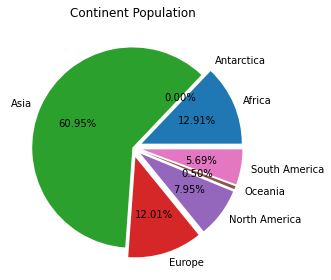

In [15]:
data = list(continent['Population'])
labels = list(continent['Population'].index)
explode = [0.1, 0.1, 0, 0.1, 0.1, 0.1, 0.1]

plt.pie(data, labels=labels, explode=explode,
        autopct=lambda p:f'{p:.2f}%')

plt.title("Continent Population")
plt.tight_layout()
plt.show()

### 2.1
### Di lihat dari presentase benua di atas, Benua Asia merupakan penyumbang populasi terbanyak.


### 2.2
- ### Benua Amerika utara memiliki presentase populasi manusia sebanyak 7.95 %
- ### Benua Amerika selatan memiliki presentase populasi manusia sebanyak 5.69 %

In [16]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6041.00,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,17000.00,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,116729.00,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3377.00,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [17]:
country[country['Continent']=='Asia'].sort_values('Population', ascending=False)[['Name', 'Population']].head(10)

,Name,Population
41,China,1277558000
99,India,1013662000
98,Indonesia,212107000
164,Pakistan,156483000
21,Bangladesh,129155000
109,Japan,126714000
230,Vietnam,79832000
168,Philippines,75967000
102,Iran,67702000
215,Turkey,66591000


> # __No 3__

## __3.1__

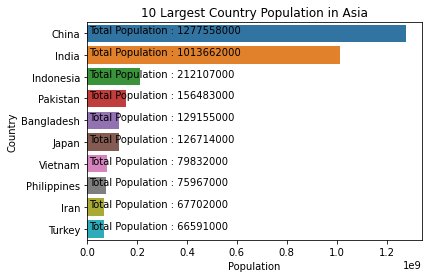

In [18]:
y = list(country[country['Continent']=='Asia'].sort_values('Population',ascending=False)['Name'].head(10))
x = list(country[country['Continent']=='Asia'].sort_values('Population',ascending=False)['Population'].head(10))
y_pos = np.arange(len(y))

ax = sns.barplot(x=x, y=y)
ax.set_yticklabels(y)
ax.set_title('10 Largest Country Population in Asia')
ax.set_ylabel('Country')
ax.set_xlabel('Population')


for a in y_pos :
    plt.text(10000000,a,f'Total Population : {x[a]}')

plt.show()

### 3.2
#### Negara yang memiliki populasi terbanyak adalah negara China

### 3.3
#### Berdasarkan horizontal barplot, negara Turkey berada di urutan ke 10

### 3.4
#### Indonesia berada di urutan ke 3 dengan populasi sebanyak 212107000

> # __No 4__

In [19]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6041.00,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,17000.00,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,116729.00,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3377.00,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [20]:
life_expectancy = country[country['Continent']=='Asia']['LifeExpectancy']
life_expectancy

1      45.9
7      74.1
9      66.4
16     62.9
21     60.2
23     73.0
32     73.6
33     52.4
41     71.4
54     76.7
77     64.5
92     79.5
98     68.0
99     62.5
102    69.7
103    66.5
105    78.6
108    77.4
109    80.7
110    63.2
112    63.4
113    56.5
116    74.4
117    76.1
118    53.1
119    71.3
124    71.8
129    81.6
134    62.2
140    54.9
141    67.3
149    70.8
160    57.8
163    71.8
164    61.1
168    67.5
173    70.7
176    71.4
178    72.4
183    67.8
186    80.1
203    68.5
207    68.6
208    64.1
210    60.9
211    46.0
215    71.0
217    76.4
224    63.7
230    69.3
234    59.8
Name: LifeExpectancy, dtype: object

In [21]:
life_expectancy.dtypes

dtype('O')

In [22]:
df1 = life_expectancy
df1 = df1.astype(float)

In [23]:
df1.describe()

count    51.000000
mean     67.441176
std       8.396527
min      45.900000
25%      62.700000
50%      68.500000
75%      72.700000
max      81.600000
Name: LifeExpectancy, dtype: float64

### 4.1 IQR

In [24]:
q3 = np.quantile(df1, .75)
q1 = np.quantile(df1, .25)
iqr = q3 - q1
print(f'IQR Benua Asia = {iqr}')

IQR Benua Asia = 10.0


### 4.2 Mean Median Std Upper Lower

In [25]:
mean = np.mean(df1)
mean

67.44117647058825

In [26]:
median = np.median(df1)
median

68.5

In [27]:
std = st.stdev(df1)
std

8.39652729336571

In [28]:
upper = q3 + 1.5*iqr
upper

87.7

In [29]:
lower = q1 - 1.5*iqr
lower

47.7

### 4.3

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


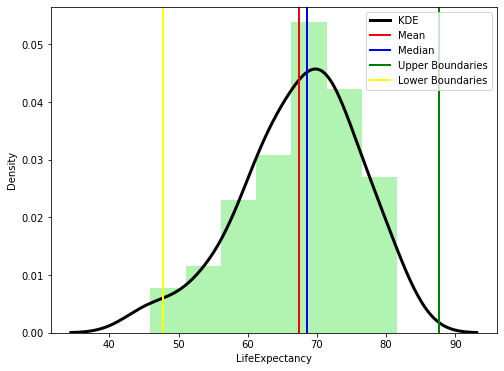

In [30]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df1, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"alpha": 0.7, "color": "lightgreen"})

plt.axvline(mean, color='red', label='Mean', linewidth=2)
plt.axvline(median, color='blue', label='Median', linewidth=2)
plt.axvline(upper, color='green', label='Upper Boundaries', linewidth=2)
plt.axvline(lower, color='yellow', label='Lower Boundaries', linewidth=2)
plt.legend()

plt.show()

### 4.4 outliers 

In [31]:
Asia = country[country['Continent']=='Asia']
Asia[(Asia['LifeExpectancy']>upper) | (Asia['LifeExpectancy']<lower)]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.00,NaN,885000,46.0,0.00,None,Timor Timur,Administrated by the UN,José Alexandre Gusmão,1522.0,TP


# __No 5__

In [32]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6041.00,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,17000.00,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,116729.00,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3377.00,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM


### 5.1
### GNP dikalikan 1,000,000

In [33]:
# country['GNP'] = country['GNP']*1000000

In [34]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6041.00,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,17000.00,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,116729.00,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3377.00,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM


### 5.2
### GNPperkapita

In [35]:
country['GNP'] = country['GNP'].astype(float) 

In [36]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    object 
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 28.1+ KB


In [37]:
# def gnppercapita(x,y) :
#     data = []
#     for a in range(len(x)) :
#         data.append(x[a]/y[a])
        
#     return data

In [38]:
def percapita(GNP, POP):
    return GNP / POP
GNP_Percapita = percapita(country['GNP'], country['Population'])
country['GNPPerCapita'] = GNP_Percapita

In [39]:
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPPerCapita
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.0,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,0.008039
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,0.000263
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.0,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO,0.000516
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,0.007900
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.0,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,0.000942


In [40]:
# country = country.drop(GNPperCapita, axis='columns')

In [41]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    object 
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
 15  GNPPerCapita    232 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 30.0+ KB


## __No 6__

### Korelasi

In [42]:
country['LifeExpectancy'].corr(country['GNPPerCapita'],method='spearman')

0.7451212078375073

In [43]:
country['LifeExpectancy'] = country['LifeExpectancy'].astype(float) 

In [44]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    object 
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    object 
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
 15  GNPPerCapita    232 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage: 30.0+ KB


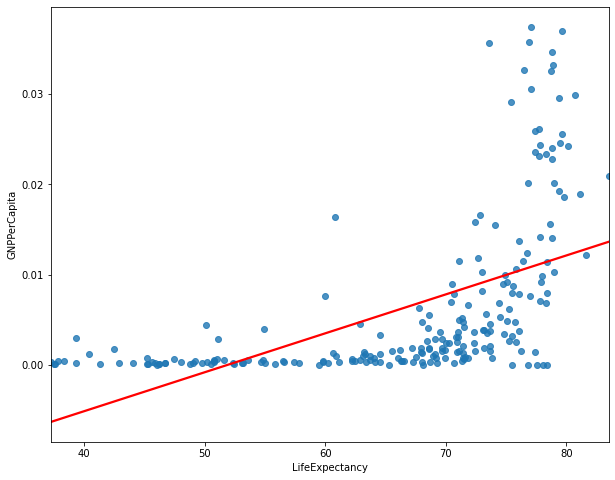

In [45]:
plt.figure(figsize=(10,8))
ax = sns.regplot(x="LifeExpectancy", y="GNPPerCapita", data=country, ci=None,
                 line_kws={'color':'red'})

#### LifeExpectancy yang tinggi _tidak_ akan selalu memiliki GNPPerCapita yang tinggi

### 6.2
#### terlihat dari plot di atas, terdapat negara yang memiliki lifeExpectancy ringgi namun memiliki GNPPerCapita yang rendah

### 6.3
#### benua yang memiliki negara dengan GNPPercapita tertinggi

In [46]:
country

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPPerCapita
0,ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.0,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,0.008039
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.0,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,0.000263
2,AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.0,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO,0.000516
3,AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.2,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,0.007900
4,ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.0,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,0.000942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6041.0,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,0.000334
235,YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,17000.0,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU,0.001598
236,ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,116729.0,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA,0.002891
237,ZMB,Zambia,Africa,Eastern Africa,752618.00,1964.0,9169000,37.2,3377.0,3922.00,Zambia,Republic,Frederick Chiluba,3162.0,ZM,0.000368


In [47]:
continent_max = country[country['GNPPerCapita'] == country['GNPPerCapita'].max()]['Continent']
list(continent_max)[0]

'Europe'

In [48]:
country[country['Continent']==list(continent_max)[0]].sort_values('GNPPerCapita', ascending=False)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPPerCapita
127,LUX,Luxembourg,Europe,Western Europe,2586.00,1867.0,435700,77.1,16321.0,15519.00,Luxembourg/Lëtzebuerg,Constitutional Monarchy,Henri,2452.0,LU,0.037459
39,CHE,Switzerland,Europe,Western Europe,41284.00,1499.0,7160400,79.6,264478.0,256092.00,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH,0.036936
123,LIE,Liechtenstein,Europe,Western Europe,160.00,1806.0,32300,78.8,1119.0,1084.00,Liechtenstein,Constitutional Monarchy,Hans-Adam II,2446.0,LI,0.034644
59,DNK,Denmark,Europe,Nordic Countries,43094.00,800.0,5330000,76.5,174099.0,169264.00,Danmark,Constitutional Monarchy,Margrethe II,3315.0,DK,0.032664
159,NOR,Norway,Europe,Nordic Countries,323877.00,1905.0,4478500,78.7,145895.0,153370.00,Norge,Constitutional Monarchy,Harald V,2807.0,NO,0.032577
104,ISL,Iceland,Europe,Nordic Countries,103000.00,1944.0,279000,79.4,8255.0,7474.00,Ísland,Republic,Ólafur Ragnar Grímsson,1449.0,IS,0.029588
15,AUT,Austria,Europe,Western Europe,83859.00,1918.0,8091800,77.7,211860.0,206025.00,Österreich,Federal Republic,Thomas Klestil,1523.0,AT,0.026182
56,DEU,Germany,Europe,Western Europe,357022.00,1955.0,82164700,77.4,2133367.0,2102826.00,Deutschland,Federal Republic,Johannes Rau,3068.0,DE,0.025965
200,SWE,Sweden,Europe,Nordic Countries,449964.00,836.0,8861400,79.6,226492.0,227757.00,Sverige,Constitutional Monarchy,Carl XVI Gustaf,3048.0,SE,0.025559
18,BEL,Belgium,Europe,Western Europe,30518.00,1830.0,10239000,77.8,249704.0,243948.00,België/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE,0.024388
